# Exploring Global COVID-19 Trends and Predicting New Cases in the USA

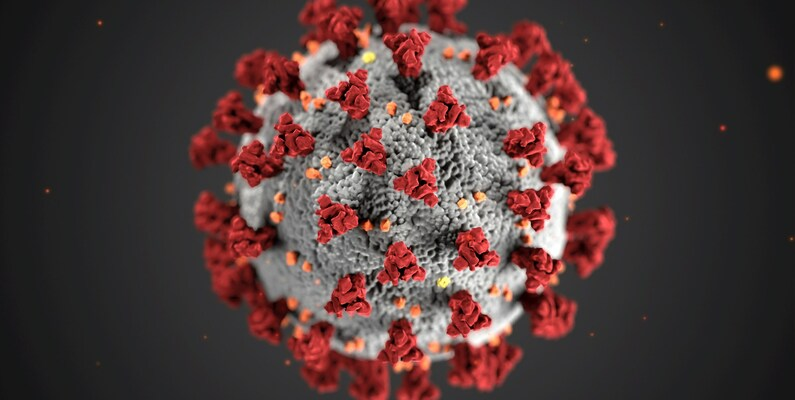![](cov.jpeg)

### **Problem Statement**

**Overview:** In this application, I will explore a dataset from Kaggle. This dataset, provided by the World Health Organization (WHO), contains daily reported COVID-19 cases and deaths worldwide. It consists of 57,840 entries and 8 columns, covering various epidemiological statistics.
The COVID-19 pandemic has had a profound impact on public health and the economy, necessitating forecasting and risk prediction models to help decision-making. Accurate forecasting of COVID-19 cases can assist policymakers, healthcare professionals, and researchers in optimizing resource allocation, implementing timely interventions, and mitigating the spread of the virus.

**Goal:** The primary goal of this project is to explore the COVID-19 trends around the globe and  to develop a machine learning model to predict the  daily new cases in the United States. This will involve:
* Time Series Forecasting: Predicting the daily number of new cases over the next few weeks.


## **Data Acquisition:**

#Data Acquisition Plan

1. Primary Data Source: WHO COVID-19 global dataset from Kaggle. This provides a comprehensive time-series view of reported cases and deaths globally, crucial for time series forecasting and identifying broader trends."
2. The process will include data cleaning, handling missing values, feature engineering, and data transformation as needed.


### **Data Understanding**



### Steps to Understand the Dataset and Identify Issues

1. Import the necessary libraries and load the dataset into a Pandas DataFrame.
2. Understand the datastructure
   - Identify data types (numeric, categorical, text, etc.).
   - Highlight missing or null values.
   - Shows basic statistics like mean, median, min, max, and standard deviation.
3. Check for missing or null values
4. Identify duplicates
5. Understand relationships between variables





### Import Module

In [5]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,9)
plt.style.use("fivethirtyeight")

# prepare data
from sklearn.model_selection import train_test_split

# model
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# %matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  LabelEncoder, StandardScaler, PolynomialFeatures, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge

import plotly.express as px

import statsmodels.graphics.tsaplots as tsaplots
import statsmodels.api as sm
from statsmodels.tsa.filters.filtertools import convolution_filter
import statsmodels.graphics.tsaplots as tsplots
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
import itertools
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

!pip install pmdarima
import pmdarima as pm
import warnings
warnings.filterwarnings('ignore')



from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

print("All modules are loaded")

All modules are loaded


### Load and read WHO COVID19 global data


In [6]:
dat1 = pd.read_csv("WHO-COVID-19-global-data.csv", sep=';')
df = dat1.copy()

In [7]:
# show first 5 rows of the data
df.head(5)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [8]:
# change column names with upper case letter to lower case
df.columns = df.columns.str.lower()
df.head()

,date_reported,country_code,country,who_region,new_cases,cumulative_cases,new_deaths,cumulative_deaths
0,05/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
1,12/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
2,19/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
3,26/01/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0
4,02/02/2020,AF,Afghanistan,EMRO,NaN,0,NaN,0


In [9]:
# determine the shape of the dataframe
df.shape

(57840, 8)

In [10]:
# check data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57840 entries, 0 to 57839
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_reported      57840 non-null  object 
 1   country_code       57599 non-null  object 
 2   country            57840 non-null  object 
 3   who_region         53502 non-null  object 
 4   new_cases          39028 non-null  float64
 5   cumulative_cases   57840 non-null  int64  
 6   new_deaths         25001 non-null  float64
 7   cumulative_deaths  57840 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.5+ MB


In [11]:
# find the details of dataset
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date_reported,57840,241,05/01/2020,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_code,57599,239,AF,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,57840,240,Afghanistan,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,53502,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,39028.0,NaN,NaN,NaN,19881.036743,270782.29363,-65079.0,43.0,393.0,3968.0,40475477.0
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,7797691.437049,0.0,4162.75,45883.0,522087.25,103436829.0
new_deaths,25001.0,NaN,NaN,NaN,282.323947,1214.392195,-3432.0,4.0,20.0,105.0,47687.0
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,81864.399905,0.0,28.0,565.0,6974.5,1194158.0


### Handling Missing Values

In [12]:
#find the missing values
missing = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})
print(missing_df)

                   Missing Values  Percentage
date_reported                   0    0.000000
country_code                  241    0.416667
country                         0    0.000000
who_region                   4338    7.500000
new_cases                   18812   32.524205
cumulative_cases                0    0.000000
new_deaths                  32839   56.775588
cumulative_deaths               0    0.000000


#### To handle the missing values for country code, we will look for country names and map them to country code as there is no missing country name in the dataset.

In [13]:
# check for unique countries
df['country'].unique()
print(f"Total unique countries names: {(df['country'].unique())}")
print(f"Total unique countries: {len(df['country'].unique())}")

Total unique countries names: ['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Saint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "C�te d'Ivoire" 'Croatia' 'Cuba'
 'Cura�ao' 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia' 'Falkland Islands (Malvinas)'
 'Faroe I

#### In the country names, we see that there is some encoding issues in some country names. We will fix the encoding issue.

In [14]:
# Handle encoding issues

# normalize unicode characters
import unicodedata
!pip install ftfy
from ftfy import fix_text


def normalize_country_name(country):
    return unicodedata.normalize('NFKD', country).encode('ascii', 'ignore').decode('utf-8', 'ignore')

df["country"] = df["country"].apply(normalize_country_name)

# Option 2:  Use a library like ftfy to fix text encoding issues more effectively


df['country'] = df['country'].apply(fix_text)

# After applying one of these methods, check the unique values again to see if the encoding issues are resolved:
print(df['country'].unique())


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 2.4 MB/s eta 0:00:00
['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia (Plurinational State of)' 'Bonaire, Saint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde'
 'Cambodia' 'Cameroon' 'Canada' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' "Cte d'Ivoire" 'Croatia' 'Cuba'
 'Curaao' 'Cyprus' 'Czechia' "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Eswatini' 'Eth

In [15]:
# save the country name fixed data as a new dataframe
covid = df.copy()
# save dataset as csv file
covid.to_csv("covid_global.csv", index=False)
# check the encoding issue removed
#covid['country'].unique()

In [16]:
# Check unique country code
covid['country_code'].unique()

array(['AF', 'AL', 'DZ', 'AS', 'AD', 'AO', 'AI', 'AG', 'AR', 'AM', 'AW',
       'AU', 'AT', 'AZ', 'BS', 'BH', 'BD', 'BB', 'BY', 'BE', 'BZ', 'BJ',
       'BM', 'BT', 'BO', 'BQ', 'BA', 'BW', 'BR', 'VG', 'BN', 'BG', 'BF',
       'BI', 'CV', 'KH', 'CM', 'CA', 'KY', 'CF', 'TD', 'CL', 'CN', 'CO',
       'KM', 'CG', 'CK', 'CR', 'CI', 'HR', 'CU', 'CW', 'CY', 'CZ', 'KP',
       'CD', 'DK', 'DJ', 'DM', 'DO', 'EC', 'EG', 'SV', 'GQ', 'ER', 'EE',
       'SZ', 'ET', 'FK', 'FO', 'FJ', 'FI', 'FR', 'GF', 'PF', 'GA', 'GM',
       'GE', 'DE', 'GH', 'GI', 'GR', 'GL', 'GD', 'GP', 'GU', 'GT', 'GG',
       'GN', 'GW', 'GY', 'HT', 'VA', 'HN', 'HU', 'IS', 'IN', 'ID', 'XXL',
       'XXF', 'XXJ', 'XXI', 'XXG', 'XXH', 'IR', 'IQ', 'IE', 'IM', 'IL',
       'IT', 'JM', 'JP', 'JE', 'JO', 'KZ', 'KE', 'KI', 'XK', 'KW', 'KG',
       'LA', 'LV', 'LB', 'LS', 'LR', 'LY', 'LI', 'LT', 'LU', 'MG', 'MW',
       'MY', 'MV', 'ML', 'MT', 'MH', 'MQ', 'MR', 'MU', 'YT', 'MX', 'FM',
       'MC', 'MN', 'ME', 'MS', 'MA', 'MZ', 'MM', na

In [17]:
# Find countries with missing country codes
missing_codes = covid[covid['country_code'].isnull()]['country'].unique()

print("Countries with missing country codes:")
for country in missing_codes:
    print(country)

Countries with missing country codes:
Namibia


In [18]:
# fill the country code of Namibia as NA to missing values
covid.loc[covid['country'] == 'Namibia', 'country_code'] = 'NA'
# check for null values in country codes
covid['country_code'].isnull().sum()

0

In [19]:
# look for unique who region
covid['who_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', nan, 'OTHER'],
      dtype=object)

In [20]:
# replace the missing values of who region with 'OTHER'
covid['who_region'].fillna('OTHER', inplace=True)
covid['who_region'].isna().sum()
covid['who_region'].unique()

array(['EMRO', 'EURO', 'AFRO', 'WPRO', 'AMRO', 'SEARO', 'OTHER'],
      dtype=object)

In [21]:
# replace the missing values of new cases with zero
covid['new_cases'].fillna(0, inplace=True)
covid['new_cases'].isna().sum()


0

In [22]:
# replace the missing values of new deaths with zero
covid['new_deaths'].fillna(0, inplace=True)
covid['new_deaths'].isna().sum()

0

In [23]:
# format the date reported
covid['date_reported'] = pd.to_datetime(covid['date_reported'], format='%d/%m/%Y')
covid['date_reported'].nunique()

241

In [24]:
# add a new column as year
covid['year'] = covid['date_reported'].dt.year
covid['year'].unique()
covid['year'].isna().sum()

0

In [25]:
# check the stats of the dataset
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,57840,NaN,NaN,NaN,2022-04-24 00:00:00.000000256,2020-01-05 00:00:00,2021-02-28 00:00:00,2022-04-24 00:00:00,2023-06-18 00:00:00,2024-08-11 00:00:00,NaN
country_code,57840,240,AF,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,57840,240,Afghanistan,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,57840,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,57840.0,NaN,NaN,NaN,13414.887656,-65079.0,0.0,47.0,1242.25,40475477.0,222624.444618
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,0.0,4162.75,45883.0,522087.25,103436829.0,7797691.437049
new_deaths,57840.0,NaN,NaN,NaN,122.032867,-3432.0,0.0,0.0,12.0,47687.0,810.554113
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,0.0,28.0,565.0,6974.5,1194158.0,81864.399905
year,57840.0,NaN,NaN,NaN,2021.838174,2020.0,2021.0,2022.0,2023.0,2024.0,1.343026


### As we see that the dataset has some negative valeus, which does not make sense for the cases. We will replace those negative values with zero.

In [26]:
# replace all the numerical comlumns with negative entries in dataset with zero
covid.loc[df['new_cases'] < 0, 'new_cases'] = 0
covid.loc[covid['new_deaths'] < 0, 'new_deaths'] = 0
covid.loc[covid['cumulative_cases'] < 0, 'cumulative_cases'] = 0
covid.loc[covid['cumulative_deaths'] < 0, 'cumulative_deaths'] = 0
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,57840,NaN,NaN,NaN,2022-04-24 00:00:00.000000256,2020-01-05 00:00:00,2021-02-28 00:00:00,2022-04-24 00:00:00,2023-06-18 00:00:00,2024-08-11 00:00:00,NaN
country_code,57840,240,AF,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,57840,240,Afghanistan,241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,57840,7,EURO,13255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,57840.0,NaN,NaN,NaN,13416.06805,0.0,0.0,47.0,1242.25,40475477.0,222624.208895
cumulative_cases,57840.0,NaN,NaN,NaN,1792593.913209,0.0,4162.75,45883.0,522087.25,103436829.0,7797691.437049
new_deaths,57840.0,NaN,NaN,NaN,122.101366,0.0,0.0,0.0,12.0,47687.0,810.416881
cumulative_deaths,57840.0,NaN,NaN,NaN,20010.225743,0.0,28.0,565.0,6974.5,1194158.0,81864.399905
year,57840.0,NaN,NaN,NaN,2021.838174,2020.0,2021.0,2022.0,2023.0,2024.0,1.343026


### In further analysis, we will compute the cumulative fatality rate (CFR) so need to avoid any zero values in those columns.

In [27]:
# select the covid data set where every row has values greater than zero
covid = covid[(covid['new_cases'] > 0) & (covid['new_deaths'] > 0) & (covid['cumulative_cases'] > 0) & (covid['cumulative_deaths'] > 0)]
covid.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
date_reported,24805,NaN,NaN,NaN,2021-11-25 03:52:19.641201408,2020-01-05 00:00:00,2021-01-31 00:00:00,2021-10-24 00:00:00,2022-08-07 00:00:00,2024-08-11 00:00:00,NaN
country_code,24805,227,IT,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,24805,227,Italy,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
who_region,24805,7,EURO,8769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
new_cases,24805.0,NaN,NaN,NaN,30853.8385,1.0,336.0,1884.0,9833.0,40475477.0,338685.810776
cumulative_cases,24805.0,NaN,NaN,NaN,2812505.260633,1.0,30354.0,260234.0,1453522.0,103436829.0,9320949.199959
new_deaths,24805.0,NaN,NaN,NaN,281.121145,1.0,4.0,20.0,104.0,47687.0,1217.029844
cumulative_deaths,24805.0,NaN,NaN,NaN,33870.540536,1.0,417.0,3923.0,19611.0,1127152.0,98212.07801
year,24805.0,NaN,NaN,NaN,2021.411611,2020.0,2021.0,2021.0,2022.0,2024.0,1.074612


In [28]:
# Check for duplicates
covid.duplicated().sum()

0

# Exploratory Data Analysis (EDA)

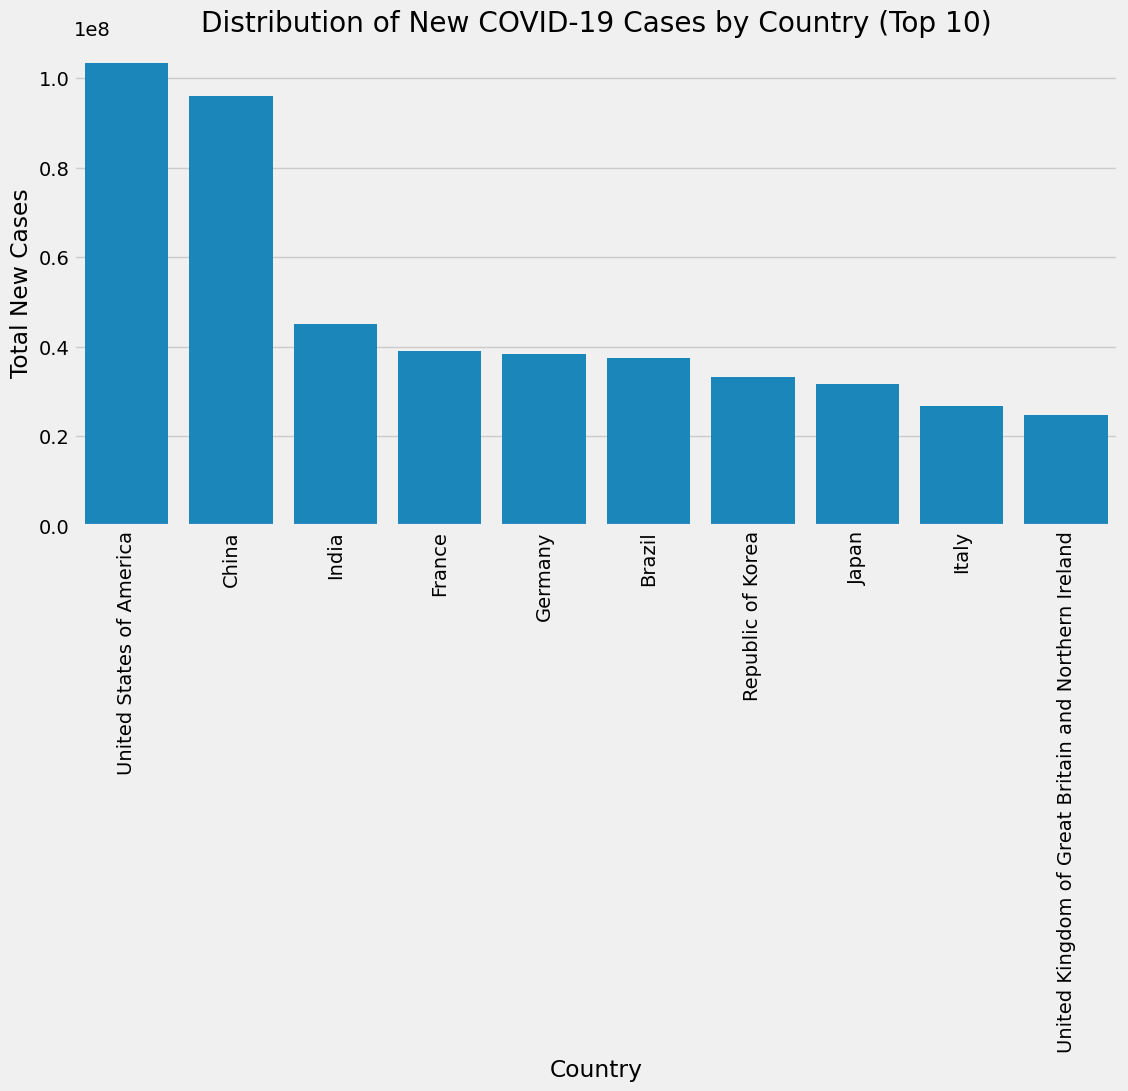

In [29]:
# Group data by country and sum new cases
cases_by_country = covid.groupby('country')['new_cases'].sum().reset_index()

# Sort countries by total cases in descending order
cases_by_country = cases_by_country.sort_values('new_cases', ascending=False)

# Plot the distribution of new cases per country
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='new_cases', data=cases_by_country.head(10)) # Plot top 10 countries
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Total New Cases')
plt.title('Distribution of New COVID-19 Cases by Country (Top 10)')
plt.show()


### From above distribution, we see that the cases are in large number so it would be better to transform the numbers into log.

In [30]:
# Select numerical columns for log transformation and drop year column
num_cols = covid.select_dtypes(include=np.number).columns.drop(['year'])

# Apply log transformation to numerical columns, handling potential zeros
for col in num_cols:
    # Add 1 to handle zero values before taking the log
    covid[col + '_log'] = np.log1p(covid[col])

# Print the updated DataFrame to see the new log-transformed columns
print(covid.head())


   date_reported country_code      country who_region  new_cases  \
12    2020-03-29           AF  Afghanistan       EMRO       67.0   
13    2020-04-05           AF  Afghanistan       EMRO      183.0   
14    2020-04-12           AF  Afghanistan       EMRO      247.0   
15    2020-04-19           AF  Afghanistan       EMRO      387.0   
16    2020-04-26           AF  Afghanistan       EMRO      422.0   

    cumulative_cases  new_deaths  cumulative_deaths  year  new_cases_log  \
12                91         2.0                  2  2020       4.219508   
13               274         3.0                  5  2020       5.214936   
14               521        10.0                 15  2020       5.513429   
15               908        15.0                 30  2020       5.961005   
16              1330        13.0                 43  2020       6.047372   

    cumulative_cases_log  new_deaths_log  cumulative_deaths_log  
12              4.521789        1.098612               1.098612  
13

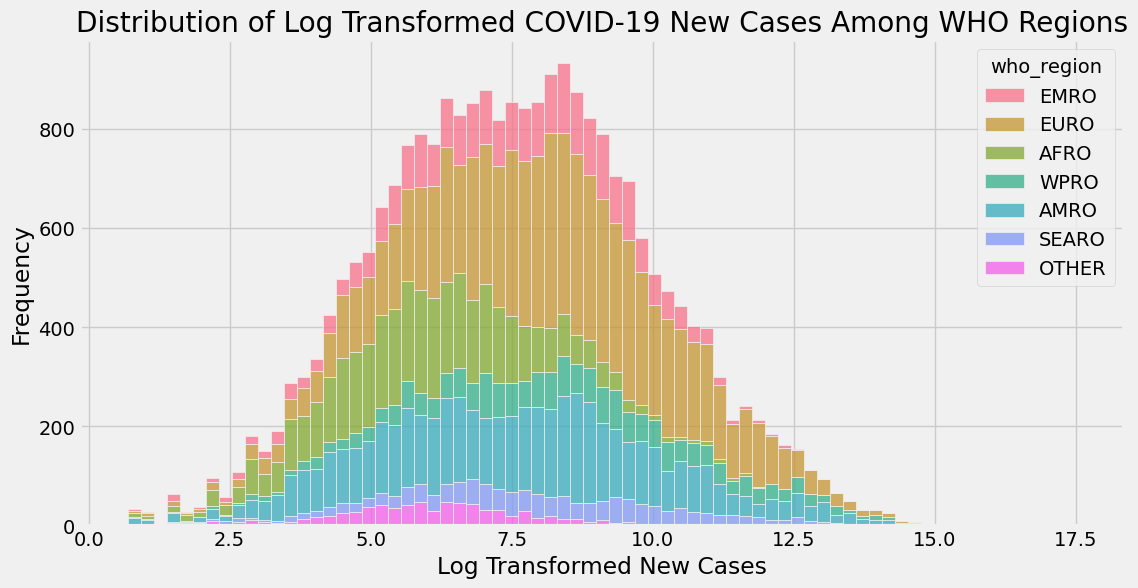

In [31]:
# Plot the distribution of log transformed new cases among the who region
plt.figure(figsize=(12, 6))
sns.histplot(covid, x='new_cases_log', hue='who_region', multiple="stack")
plt.title('Distribution of Log Transformed COVID-19 New Cases Among WHO Regions')
plt.xlabel('Log Transformed New Cases')
plt.ylabel('Frequency')
plt.show()

The above plot shows the frequency of different log-transformed new case counts for each WHO region.  Each region's distribution is stacked on top of each other. This allows for a visual comparison of how the number of new cases is distributed across regions.  

EMRO and EURO regions seem to have a higher frequency of case counts while others show a wider range.


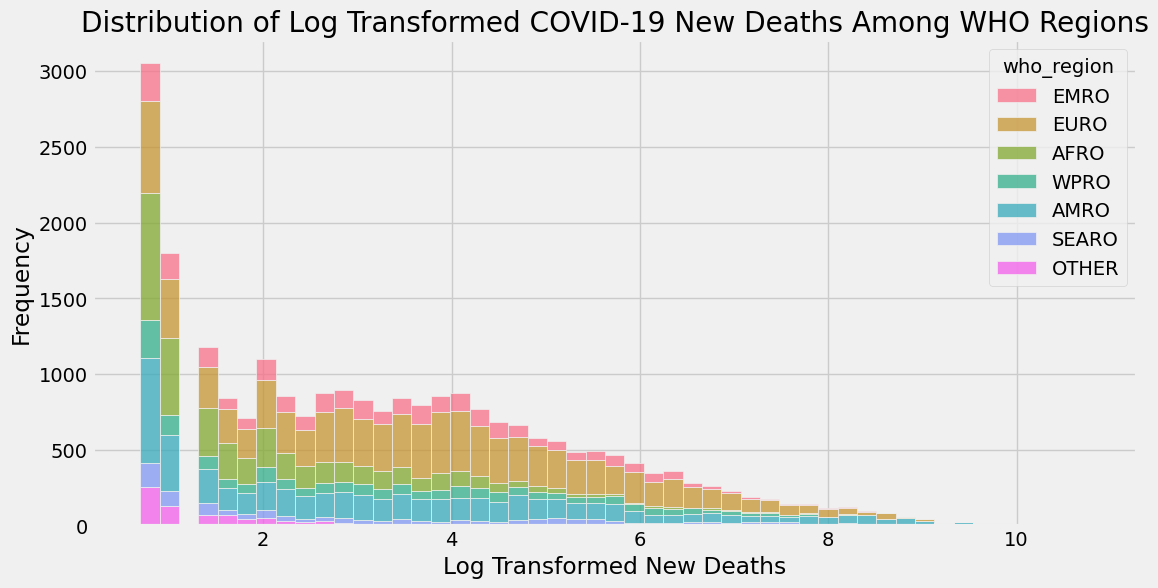

In [32]:
# Plot the distribution of log transformed new deaths among the whon region
plt.figure(figsize=(12, 6))
sns.histplot(covid, x='new_deaths_log', hue='who_region', multiple="stack")
plt.title('Distribution of Log Transformed COVID-19 New Deaths Among WHO Regions')
plt.xlabel('Log Transformed New Deaths')
plt.ylabel('Frequency')
plt.show()

The plot shows that the distribution of new deaths among regions is right skewed i.e. high number of days with low new deaths but a few days with extreme spikes (which suggests the outbreaks).

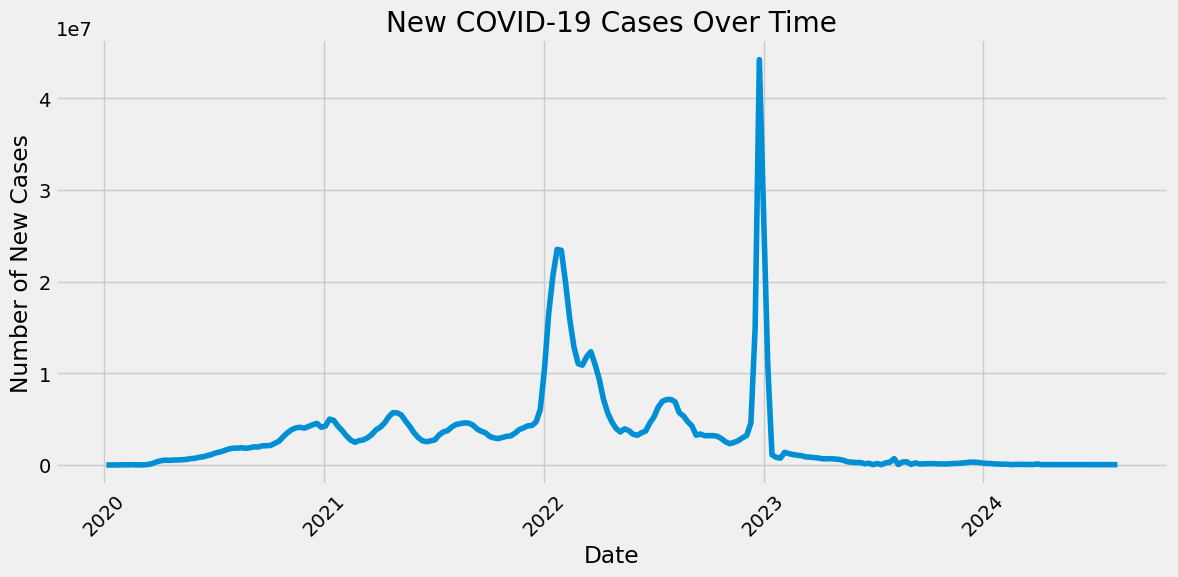

In [33]:
# Group the data by date and sum the new cases for each date
cases_over_time = covid.groupby('date_reported')['new_cases'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(cases_over_time.index, cases_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('New COVID-19 Cases Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


The two peaks in 2022 and 2023 suggests different waves of infection (e.g., Delta and Omicron waves).

The other small peaks suggests the first outbreak started in the end of 2020 and then subsided slightly and then again started increasing in mid 2021 declining slightly due to the interventions. First peak occured in starting of 2022 and started to decrease due to interventions. The second peak suged in the winters of 2022 due to another variant of the virus and started decline due to interventions and vaccination. As of 2023 spring there was no outbreak of COVID-19.


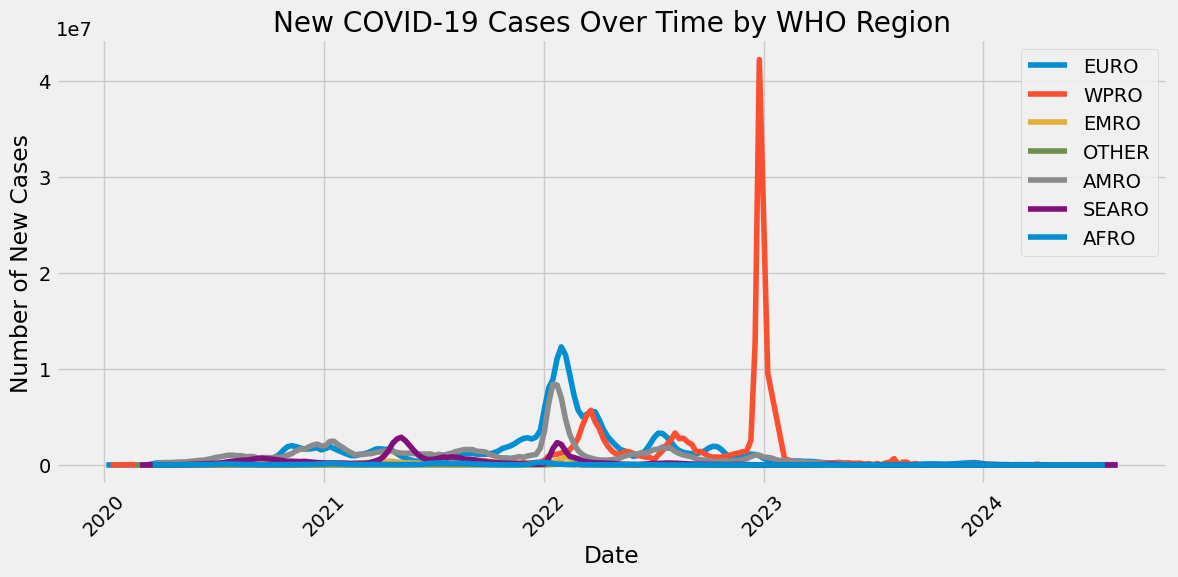

In [34]:
# Group data by date and region, then sum new cases
cases_over_time_by_region = covid.groupby(['date_reported', 'who_region'])['new_cases'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for region in cases_over_time_by_region['who_region'].unique():
    region_data = cases_over_time_by_region[cases_over_time_by_region['who_region'] == region]
    plt.plot(region_data['date_reported'], region_data['new_cases'], label=region)

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('New COVID-19 Cases Over Time by WHO Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


From this plot we see that EURO had highest number of cases in starting of 2022 and WPRO had highest number of cases in the end of 2022. Several peaks are visible, corresponding to major waves of COVID-19 outbreaks.
The most prominent spike appears in 2023 (Western Pacific - WPRO, in orange), reaching over 40 million cases. This could be due to data reporting anomalies or a specific outbreak. Other significant peaks occur around 2021 and 2022, mainly driven by Europe (EURO) and the Americas (AMRO). After each major peak, case numbers drop significantly, likely due to vaccination efforts, public health interventions, and herd immunity. By late 2023 and early 2024, the number of new cases appears relatively low in all regions.

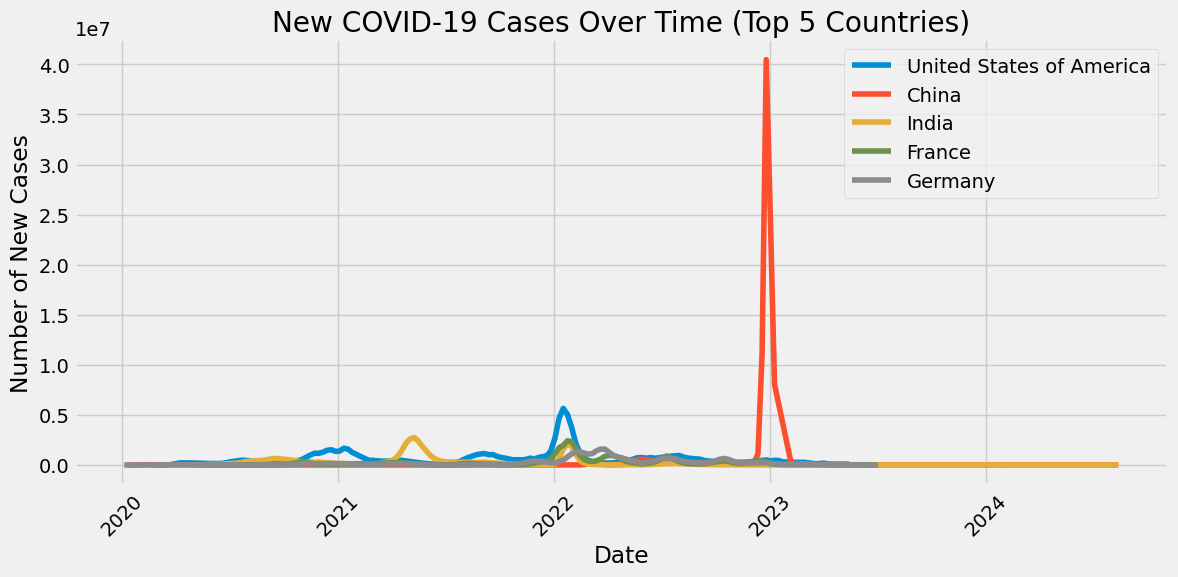

In [35]:
# Group data by country and date, then sum new cases
cases_over_time_by_country = covid.groupby(['country', 'date_reported'])['new_cases'].sum().reset_index()

# Get the top 5 countries by total cases
top_5_countries = cases_over_time_by_country.groupby('country')['new_cases'].sum().nlargest(5).index

# Filter data for the top 5 countries
top_5_cases = cases_over_time_by_country[cases_over_time_by_country['country'].isin(top_5_countries)]

# Create the plot
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = top_5_cases[top_5_cases['country'] == country]
    plt.plot(country_data['date_reported'], country_data['new_cases'], label=country)

plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('New COVID-19 Cases Over Time (Top 5 Countries)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


As we see in the above plot that USA has highest number of new cases in starting of year 2022 and China has the highest number of new cases in end of the year 2022.

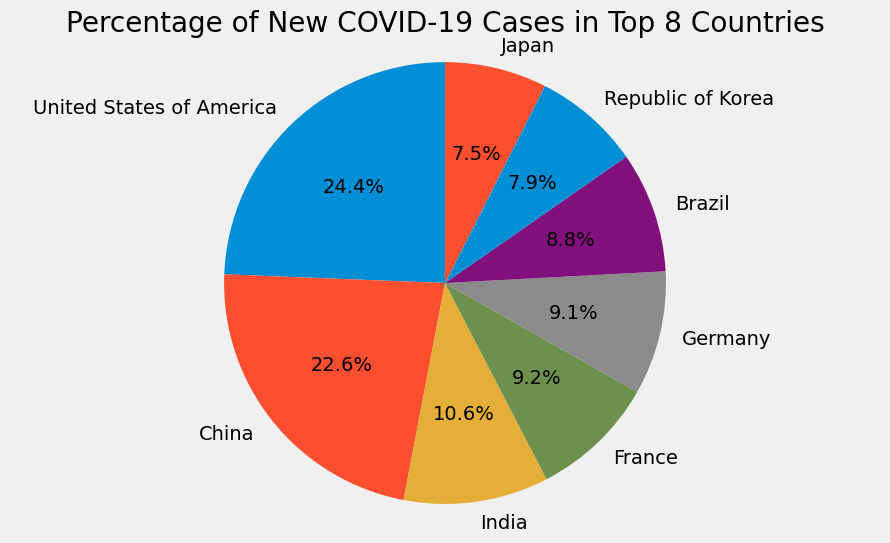

In [36]:
# Group data by country and sum new cases
cases_by_country = covid.groupby('country')['new_cases'].sum().reset_index()

# Sort countries by total cases in descending order
top_8_countries = cases_by_country.sort_values('new_cases', ascending=False).head(8)

# Calculate the percentage of new cases for each country
total_cases = top_8_countries['new_cases'].sum()
top_8_countries['percentage'] = (top_8_countries['new_cases'] / total_cases) * 100

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_8_countries['percentage'], labels=top_8_countries['country'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of New COVID-19 Cases in Top 8 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The pie chart shows the percentage of new cases in top 8 countries. The USA has highest number of infected cases  and Japan has lowest number of infected cases among these top 8 countries.

### Visualize Death Cases

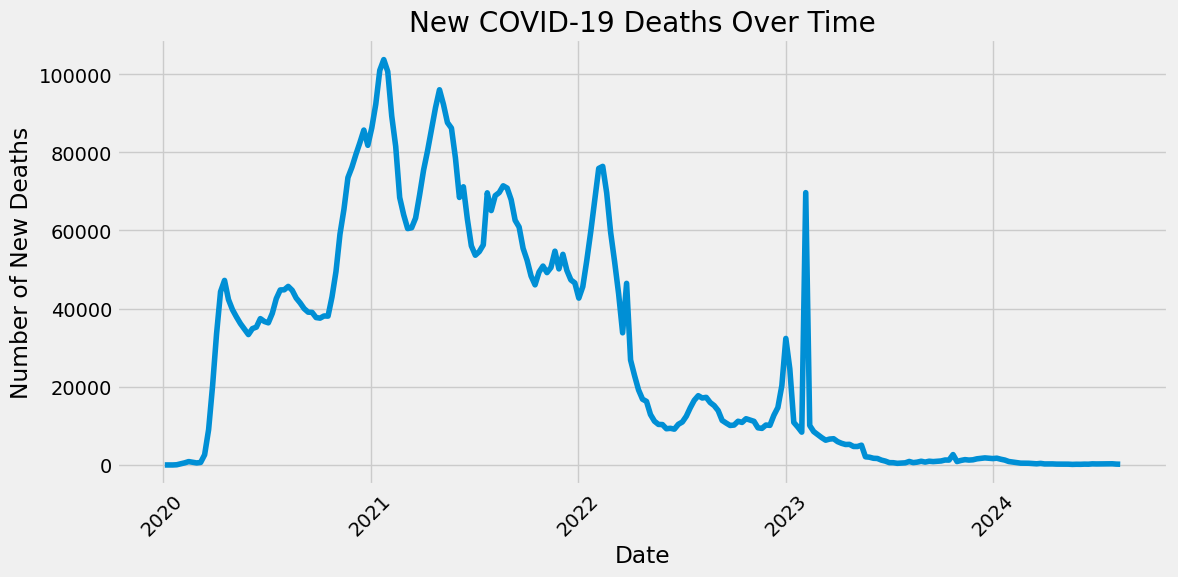

In [37]:
# Group data by date and sum the new deaths for each date
deaths_over_time = covid.groupby('date_reported')['new_deaths'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(deaths_over_time.index, deaths_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of New Deaths')
plt.title('New COVID-19 Deaths Over Time')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

This plot shows that there were around 6 surges in number of deaths i.e. outbreak. It is also clear that the number of deaths are higher in recent years (peak in firt quarter of 2021) due to the lack of intervention strategies for this new virus. The peak in starting of 2022 and end of 2022 shows that there was not enough intervent or treatment available to handle the huge surge in new cases.

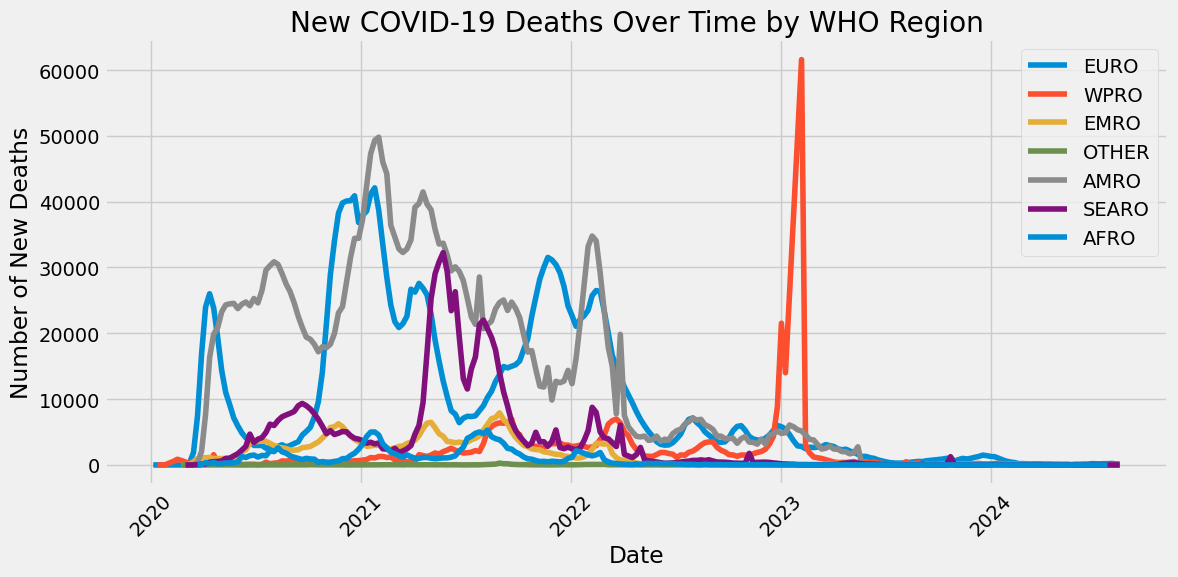

In [38]:
# Group data by date and region, then sum new deaths
deaths_over_time_by_region = covid.groupby(['date_reported', 'who_region'])['new_deaths'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))
for region in deaths_over_time_by_region['who_region'].unique():
    region_data_deaths = deaths_over_time_by_region[deaths_over_time_by_region['who_region'] == region]
    plt.plot(region_data_deaths['date_reported'], region_data_deaths['new_deaths'], label=region)

plt.xlabel('Date')
plt.ylabel('Number of New Deaths')
plt.title('New COVID-19 Deaths Over Time by WHO Region')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In this plot, EURO (Europe, blue line) and AMRO (Americas, gray line) had the highest death tolls in early waves, with multiple peaks around 2021-2022. SEARO (South-East Asia, purple line) experienced significant waves, though less pronounced than Europe or the Americas. AFRO (Africa, light blue line) and EMRO (Eastern Mediterranean, yellow line) show relatively lower peaks, indicating fewer reported deaths or different outbreak dynamics.  

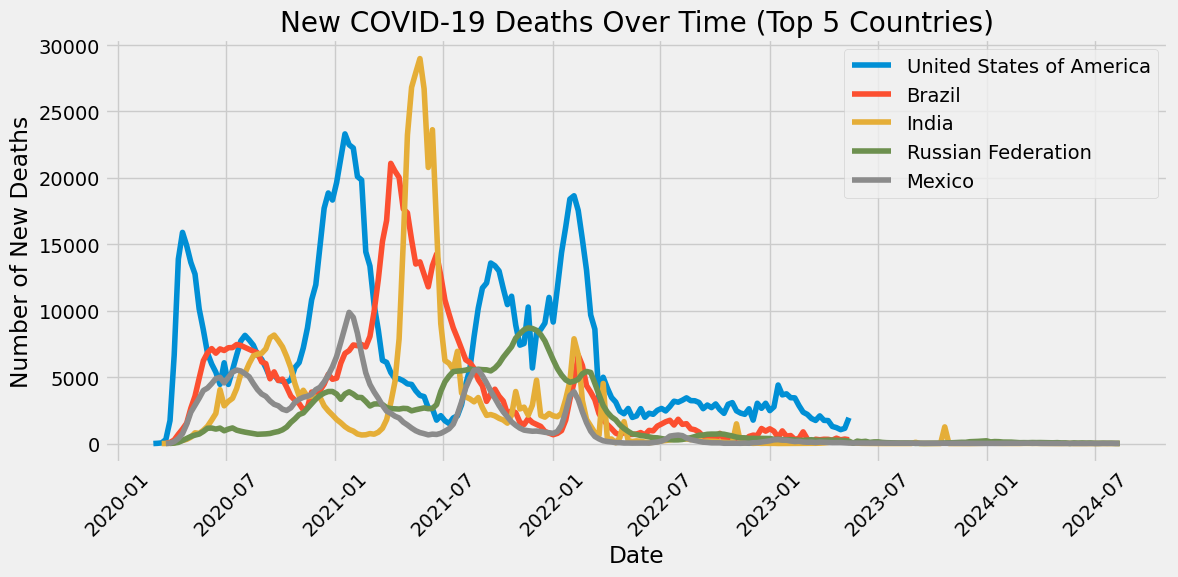

In [39]:
# Group data by country and date, then sum new deaths
deaths_over_time_by_country = covid.groupby(['country', 'date_reported'])['new_deaths'].sum().reset_index()

# Get the top 5 countries by total cases
top_5_countries_deaths = deaths_over_time_by_country.groupby('country')['new_deaths'].sum().nlargest(5).index

# Filter data for the top 5 countries
top_5_cases_deaths = deaths_over_time_by_country[deaths_over_time_by_country['country'].isin(top_5_countries_deaths)]

# Create the plot
plt.figure(figsize=(12, 6))
for country in top_5_countries_deaths:
    country_data_deaths = top_5_cases_deaths[top_5_cases_deaths['country'] == country]
    plt.plot(country_data_deaths['date_reported'], country_data_deaths['new_deaths'], label=country)

plt.xlabel('Date')
plt.ylabel('Number of New Deaths')
plt.title('New COVID-19 Deaths Over Time (Top 5 Countries)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In this plot, US (Blue Line) shows largest and most consistent peaks across all waves. Highest death toll among the five countries, especially in late 2020 and early 2021. Another major peak in early 2022, likely due to Omicron.
Gradual decline after mid-2022 but still fluctuating slightly.

Brazil (Red Line) shows a major peak around early 2021, coinciding with the Gamma variant outbreak. Significant drop after mid-2021 as vaccination efforts improved.

India (Yellow Line) shows a massive spike around mid-2021, likely due to the Delta variant surge. The peak is the highest for any country in a single wave, indicating an outbreak. Deaths dropped sharply after the wave, showing strong recovery efforts.

Mexico (Gray Line) shows two major peaks in 2020 and early 2021. More gradual decline in deaths compared to other countries. The curve is smoother, indicating a more consistent but lower-scale outbreak.

Russia (Green Line) shows more stable and moderate peaks. Not as extreme as the US, Brazil, or India but still significant. Declined gradually after mid-2022.

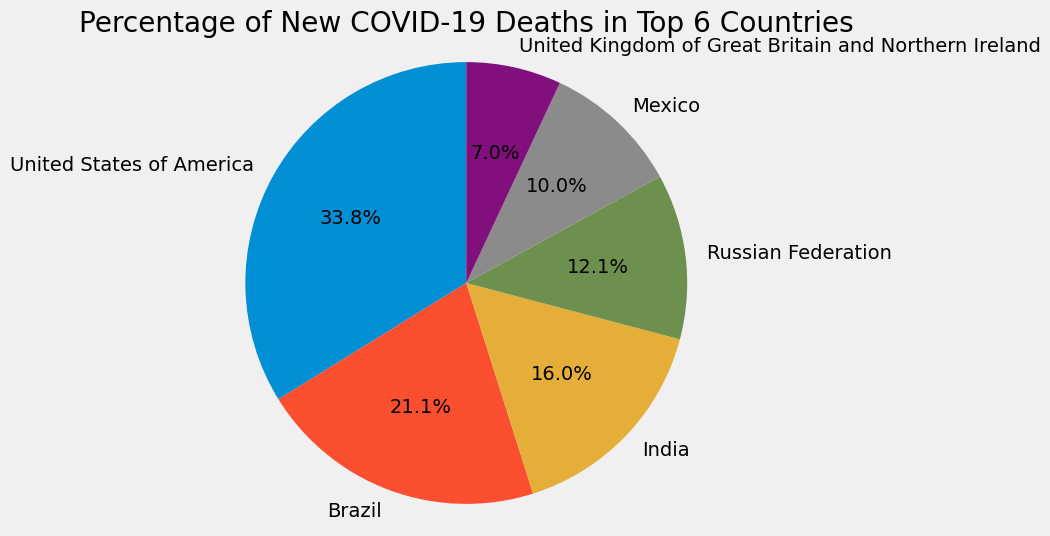

In [40]:
# Group data by country and sum new deaths
deaths_by_country = covid.groupby('country')['new_deaths'].sum().reset_index()

# Sort countries by total deaths in descending order
top_6_countries_deaths = deaths_by_country.sort_values('new_deaths', ascending=False).head(6)

# Calculate the percentage of new deaths for each country
total_deaths = top_6_countries_deaths['new_deaths'].sum()
top_6_countries_deaths['percentage'] = (top_6_countries_deaths['new_deaths'] / total_deaths) * 100

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(top_6_countries_deaths['percentage'], labels=top_6_countries_deaths['country'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage of New COVID-19 Deaths in Top 6 Countries')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In this pie chart, US (33.8%) shows largest share of new deaths among all six countries. Indicates a high mortality burden in US. UK (7.0%) shows lowest percentage in the group, suggesting better pandemic control post-2021.

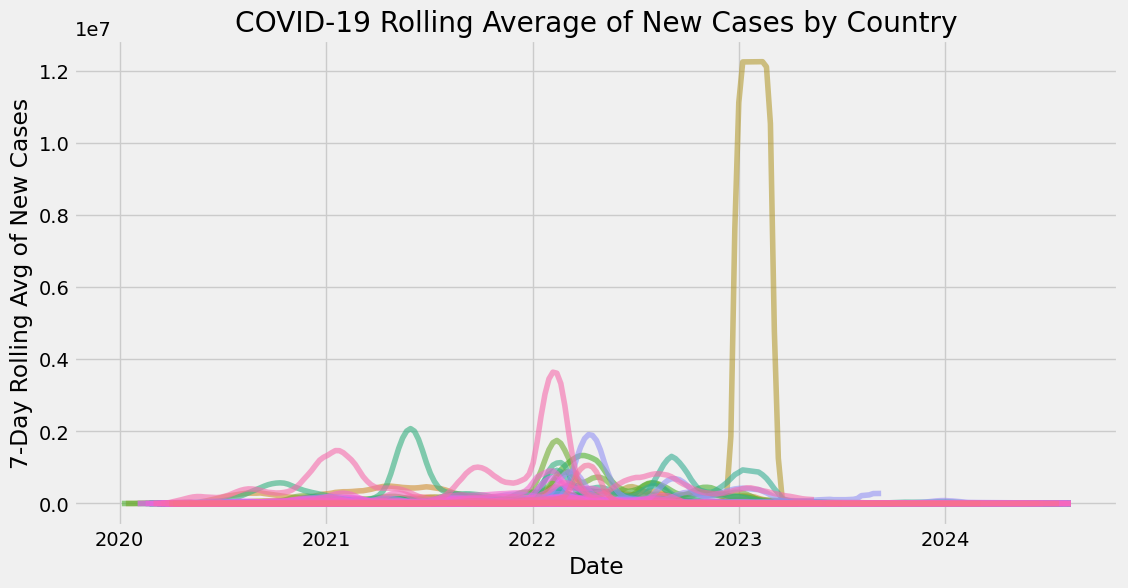

In [41]:
from pickle import TRUE
covid['rolling_avg_cases'] = covid.groupby('country')['new_cases'].transform(lambda x: x.rolling(7, min_periods=1).mean())

plt.figure(figsize=(12, 6))
sns.lineplot(data=covid, x='date_reported', y='rolling_avg_cases', hue='country', alpha=0.6, legend=False)
plt.xlabel("Date")
plt.ylabel("7-Day Rolling Avg of New Cases")
plt.title("COVID-19 Rolling Average of New Cases by Country")
plt.show()


In [42]:
top_10_countries = covid.groupby("country")["cumulative_cases"].max().nlargest(10).index
covid_top10 = covid[covid["country"].isin(top_10_countries)]


In [43]:
covid_top10["rolling_avg_cases"] = covid_top10.groupby("country")["new_cases"].transform(lambda x: x.rolling(7, min_periods=1).mean())


In [44]:
covid_top10["rolling_avg_cases"].isna().sum()

0

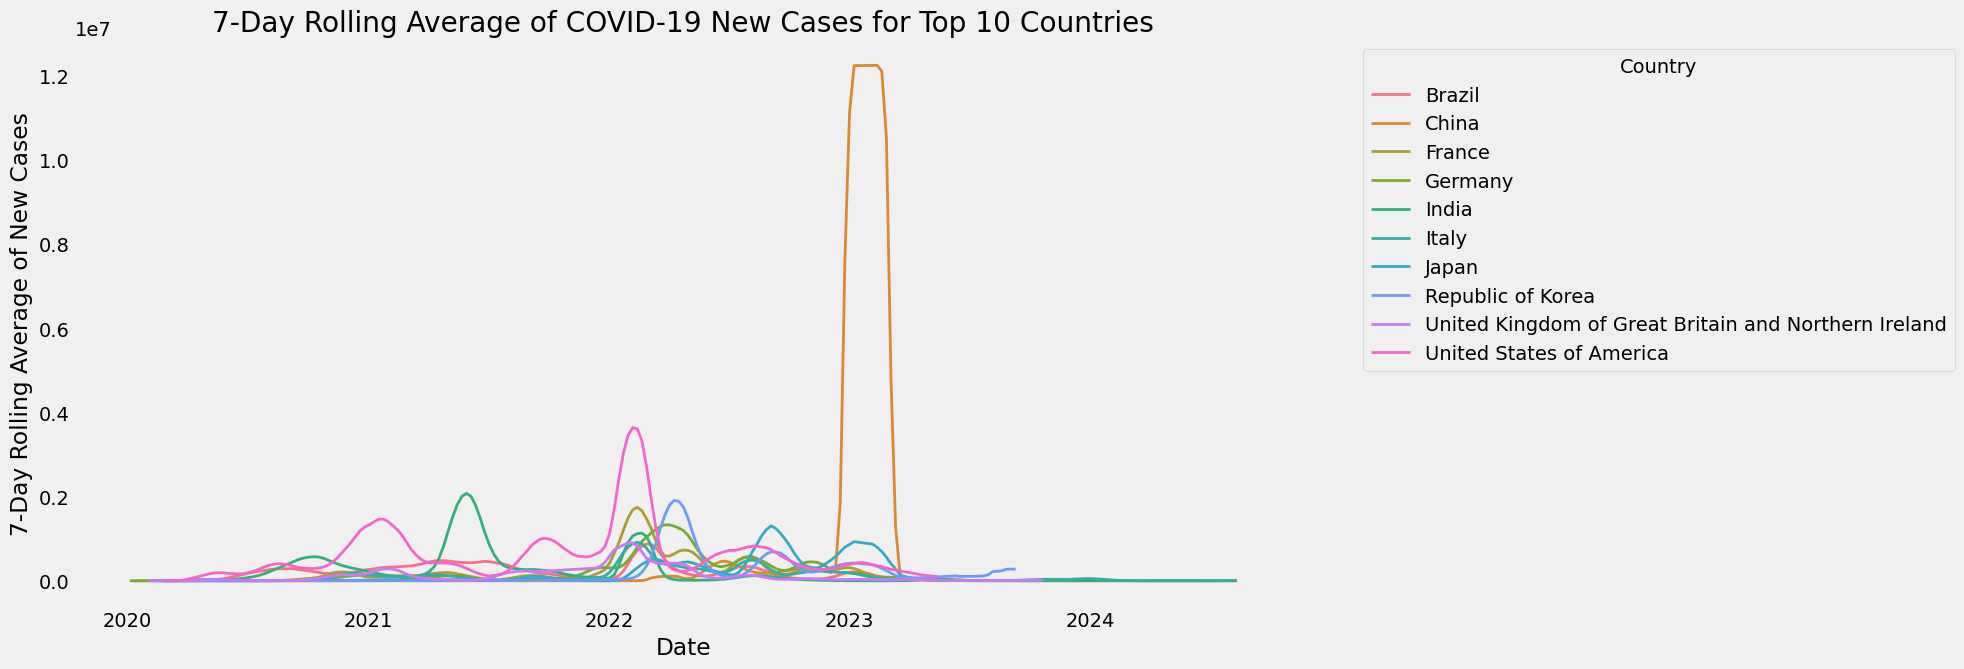

In [45]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=covid_top10, x="date_reported", y="rolling_avg_cases", hue="country", linewidth=2)
plt.xlabel("Date")
plt.ylabel("7-Day Rolling Average of New Cases")
plt.title("7-Day Rolling Average of COVID-19 New Cases for Top 10 Countries")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

## As we have seen that the highest cases were in USA and highest deaths were reported in USA. Now we will do EDA for USA and perform modeling for USA.

### **EDA for USA**

In [46]:
us_covid = covid[covid["country"] == "United States of America"]

In [47]:
# save us covid data to us-covid csv file
us_covid.to_csv("us_covid.csv", index=False)
us_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 55197 to 55364
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_reported          168 non-null    datetime64[ns]
 1   country_code           168 non-null    object        
 2   country                168 non-null    object        
 3   who_region             168 non-null    object        
 4   new_cases              168 non-null    float64       
 5   cumulative_cases       168 non-null    int64         
 6   new_deaths             168 non-null    float64       
 7   cumulative_deaths      168 non-null    int64         
 8   year                   168 non-null    int32         
 9   new_cases_log          168 non-null    float64       
 10  cumulative_cases_log   168 non-null    float64       
 11  new_deaths_log         168 non-null    float64       
 12  cumulative_deaths_log  168 non-null    float64       
 13  roll

In [48]:
# sort the us covid dataset as per date
us_covid = us_covid.sort_values("date_reported")
us_covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 55197 to 55364
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date_reported          168 non-null    datetime64[ns]
 1   country_code           168 non-null    object        
 2   country                168 non-null    object        
 3   who_region             168 non-null    object        
 4   new_cases              168 non-null    float64       
 5   cumulative_cases       168 non-null    int64         
 6   new_deaths             168 non-null    float64       
 7   cumulative_deaths      168 non-null    int64         
 8   year                   168 non-null    int32         
 9   new_cases_log          168 non-null    float64       
 10  cumulative_cases_log   168 non-null    float64       
 11  new_deaths_log         168 non-null    float64       
 12  cumulative_deaths_log  168 non-null    float64       
 13  roll

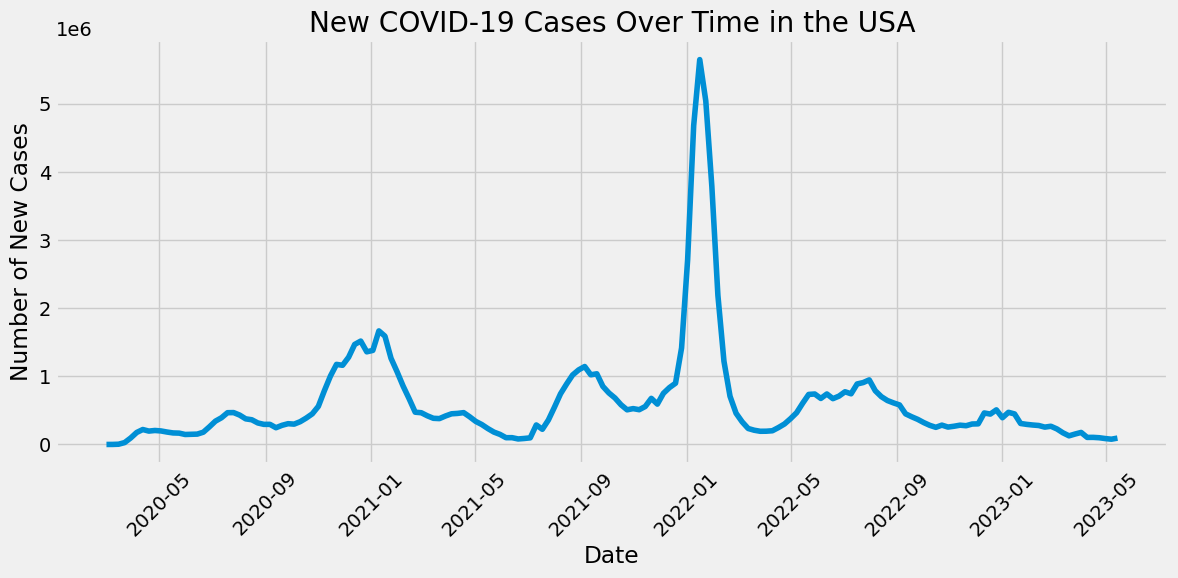

In [49]:
# plot the usa new cases over time

# Group data by date and sum new cases for the US
us_cases_over_time = us_covid.groupby('date_reported')['new_cases'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(us_cases_over_time.index, us_cases_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('New COVID-19 Cases Over Time in the USA')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The plot suggests multile outbreaks during end of 2020 and end of 2022. The highest infection surge occured during Dec 2021 - Feb 2022. Ans there is no outbreaak as of now.

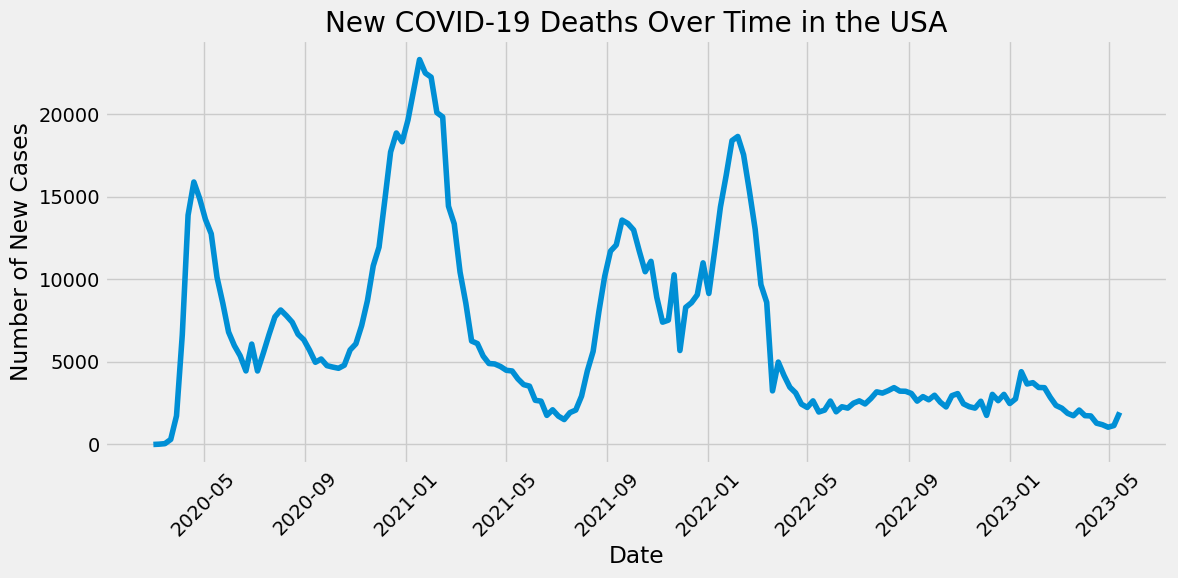

In [50]:
# plot the usa new deaths over time

# Group data by date and sum new deaths for the US
us_deaths_over_time = us_covid.groupby('date_reported')['new_deaths'].sum()

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(us_deaths_over_time.index, us_deaths_over_time.values)
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.title('New COVID-19 Deaths Over Time in the USA')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Five peaks in this plot, shows the deadlieast death toll during March 2020 - Feb 2022. The largest peak during end of 2020 and start of 2021 shows highest death toll. Second highest peak in early 2022 shows the impact of COVID virus variant Omicron. Gradualy decreasing after mid-2022 but still fluctuating slightly.

In [51]:
# find the rollivng avarage of 7 days and add thsi column to the us dataset
us_covid["rolling_avg_cases"] = us_covid["new_cases"].rolling(7, min_periods=1).mean()
us_covid["rolling_avg_cases"].isna().sum()

0

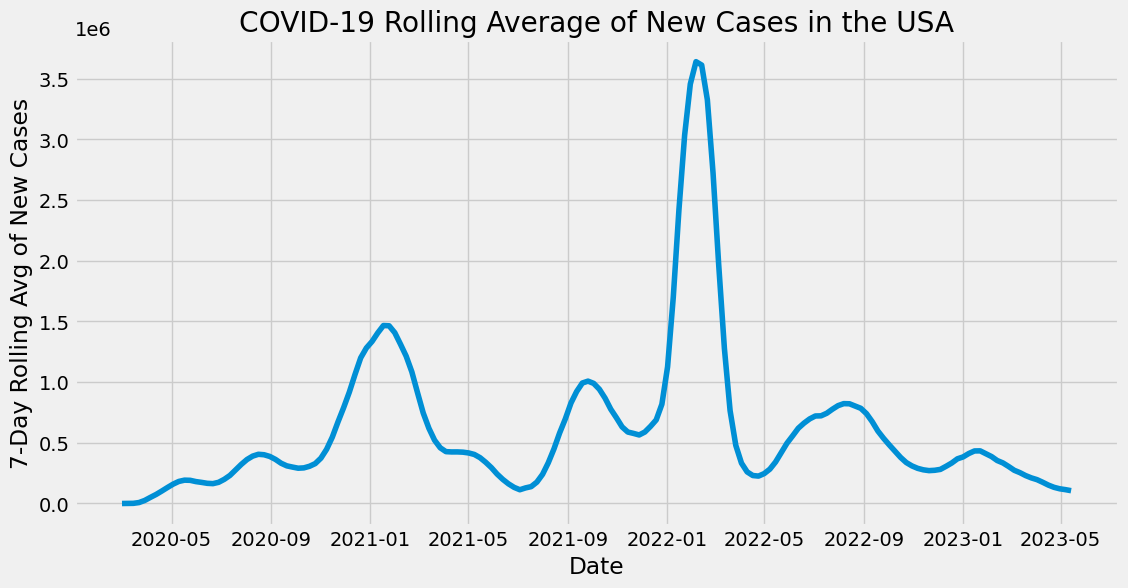

In [52]:
# plot the 7 day rolling average

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(data=us_covid, x='date_reported', y='rolling_avg_cases')
plt.xlabel("Date")
plt.ylabel("7-Day Rolling Avg of New Cases")
plt.title("COVID-19 Rolling Average of New Cases in the USA")
plt.show()


As we can see that the highest cases peak has been shifted from late 2022 to early 2021 due to 7 day rolling average.

### Case Fatality Rate (CFR) Analysis

In [53]:
# Case Fatality Rate (CFR) Analysis
us_covid["CFR"] = (us_covid["cumulative_deaths"] / us_covid["cumulative_cases"]) * 100
us_covid["CFR"].isna().sum()

0

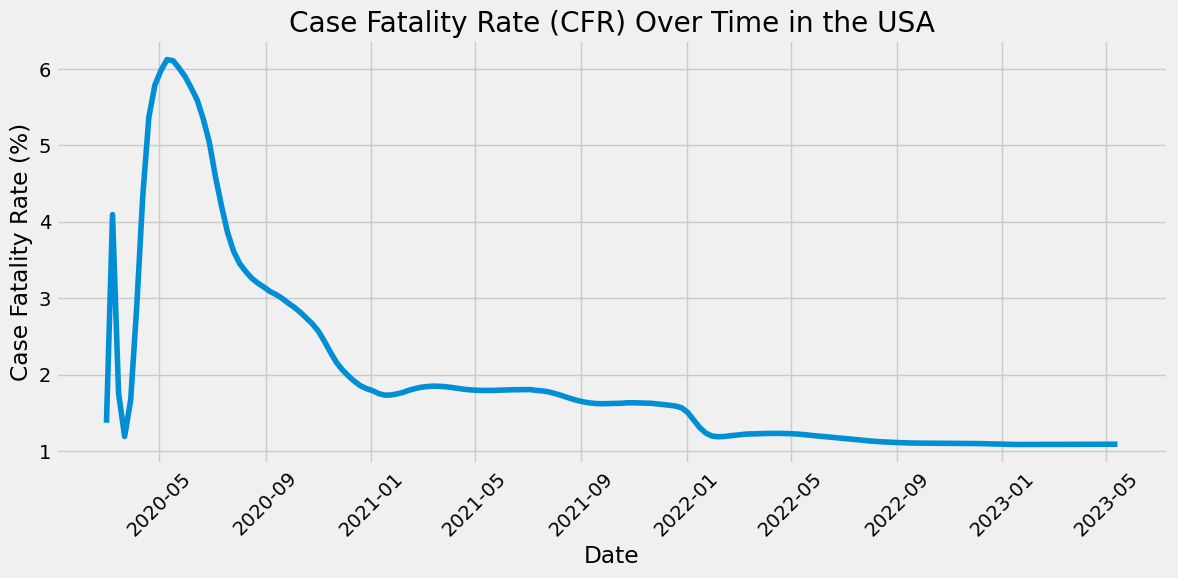

In [54]:
# plot case fertility rate over time


# Plot Case Fatality Rate (CFR) over time for the US
plt.figure(figsize=(12, 6))
plt.plot(us_covid['date_reported'], us_covid['CFR'])
plt.xlabel('Date')
plt.ylabel('Case Fatality Rate (%)')
plt.title('Case Fatality Rate (CFR) Over Time in the USA')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The 2 peaks in CFR plot suggests that the high fatality rate from early 2020 to late 2020. Gradual decline suggests the availability of better intervention and vaccination.

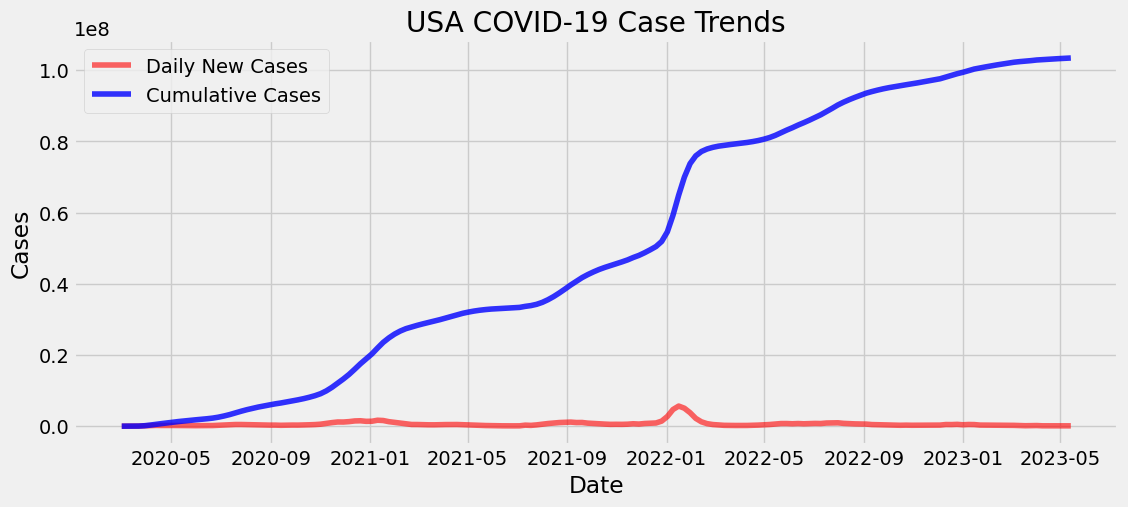

In [55]:
# USA-specific trend
us_covid = covid[covid['country_code'] == 'US'].groupby('date_reported')[['new_cases', 'cumulative_cases']].sum()

plt.figure(figsize=(12,5))
plt.plot(us_covid.index, us_covid['new_cases'], label="Daily New Cases", alpha=0.6, color='red')
plt.plot(us_covid.index, us_covid['cumulative_cases'], label="Cumulative Cases", alpha=0.8, color='blue')
plt.title("USA COVID-19 Case Trends")
plt.xlabel("Date")
plt.ylabel("Cases")
plt.legend()
plt.show()



In [56]:
# print the max us covid cumulative cases

print(us_covid['cumulative_cases'].max())


103436829


The above plot shows cumulative infected cases in USA are now 103436829.

# Predict the spread of COVID19 across US

### Data Preparation

After our initial exploration and fine-tuning of the cases understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [57]:
# Data preprocessing for ARIMA model
# first reload us dataset with date column as index and include new cases only
us_df= covid[covid["country"] == "United States of America"].set_index("date_reported")[['new_cases']]

us_df.head()

,new_cases
date_reported,
2020-03-01,33.0
2020-03-08,391.0
2020-03-15,3465.0
2020-03-22,27486.0
2020-03-29,94894.0


### Data Training

In [58]:
# train and split the dataset
y_hist, y_future= train_test_split(us_df, shuffle=False)

In [59]:
#y_hist.plot()
y_hist.tail()

,new_cases
date_reported,
2022-06-26,709637.0
2022-07-03,773772.0
2022-07-10,743769.0
2022-07-17,888229.0
2022-07-24,908695.0


In [60]:
#y_future.plot()
y_future.tail()

,new_cases
date_reported,
2023-04-16,104057.0
2023-04-23,98467.0
2023-04-30,86484.0
2023-05-07,77165.0
2023-05-14,93260.0


In [61]:
import statsmodels.graphics.tsaplots as tsaplots

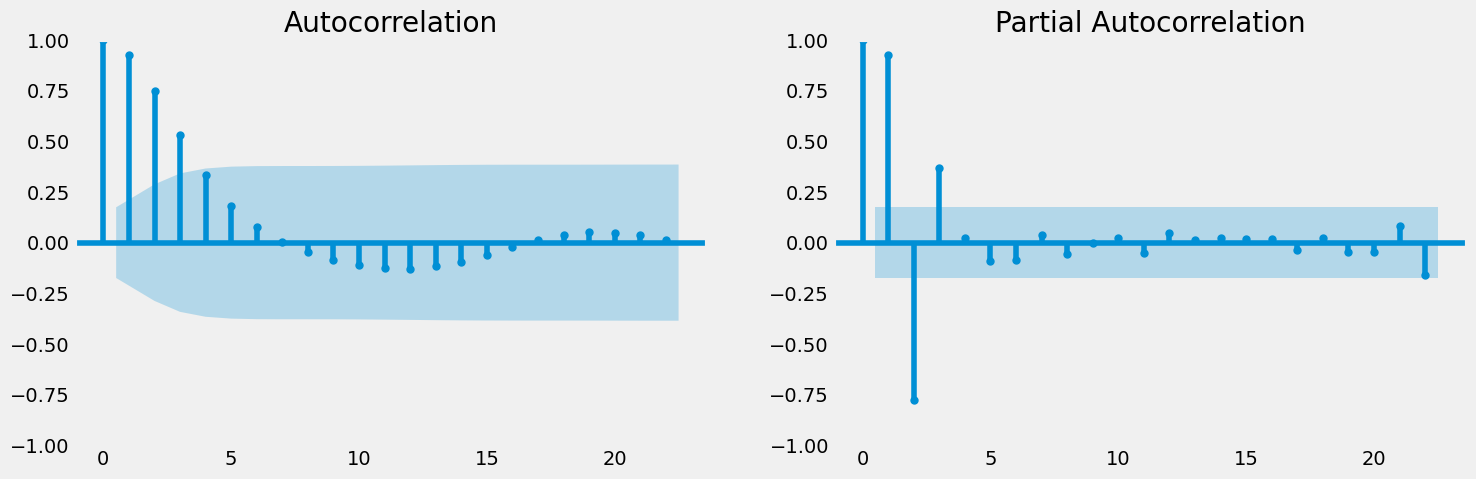

In [62]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
tsaplots.plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
tsaplots.plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

### Modeling

With final dataset in hand, it is now time to build some models.  Here, I will use time-series forecasting models to predict the new cases in USA.

In [63]:
# use grid search cv to find the optimal p, d, and q for arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import itertools


p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
pdq_combinations = list(itertools.product(p_values, d_values, q_values))

best_aic = float("inf")
best_order = None
best_model = None
best_mae = float('inf')
best_rmse = float('inf')

for order in pdq_combinations:
    try:
        model = ARIMA(y_hist, order=order)
        model_fit = model.fit()

        predictions = model_fit.predict(start=len(y_hist), end=len(us_df)-1) # Predict on the test set
        mae = mean_absolute_error(y_future, predictions)
        rmse = np.sqrt(mean_squared_error(y_future, predictions))

        if mae < best_mae:  # Prioritize lowest MAE
          best_mae = mae
          best_rmse = rmse
          best_aic = model_fit.aic
          best_order = order
          best_model = model_fit
        elif mae == best_mae and rmse < best_rmse: # If MAE is the same, choose the one with lower RMSE
          best_rmse = rmse
          best_aic = model_fit.aic
          best_order = order
          best_model = model_fit


    except Exception as e:
        print(f"Error fitting ARIMA model with order {order}: {e}")

print(f"Optimal ARIMA order (based on lowest MAE, then RMSE): {best_order}")
print("AIC: ", best_aic)
print("BIC: ", best_model.bic)
print(f"Best MAE: {best_mae}")
print(f"Best RMSE: {best_rmse}")


Optimal ARIMA order (based on lowest MAE, then RMSE): (4, 2, 1)
AIC:  3380.632264951026
BIC:  3397.553954344656
Best MAE: 136441.2908785054
Best RMSE: 158103.47069403098


MAE: new_cases    134360.850544
dtype: float64
MSE: new_cases    2.481492e+10
dtype: float64
RMSE: new_cases    157527.526808
dtype: float64
AIC: 3380.632264951026, BIC: 3397.553954344656


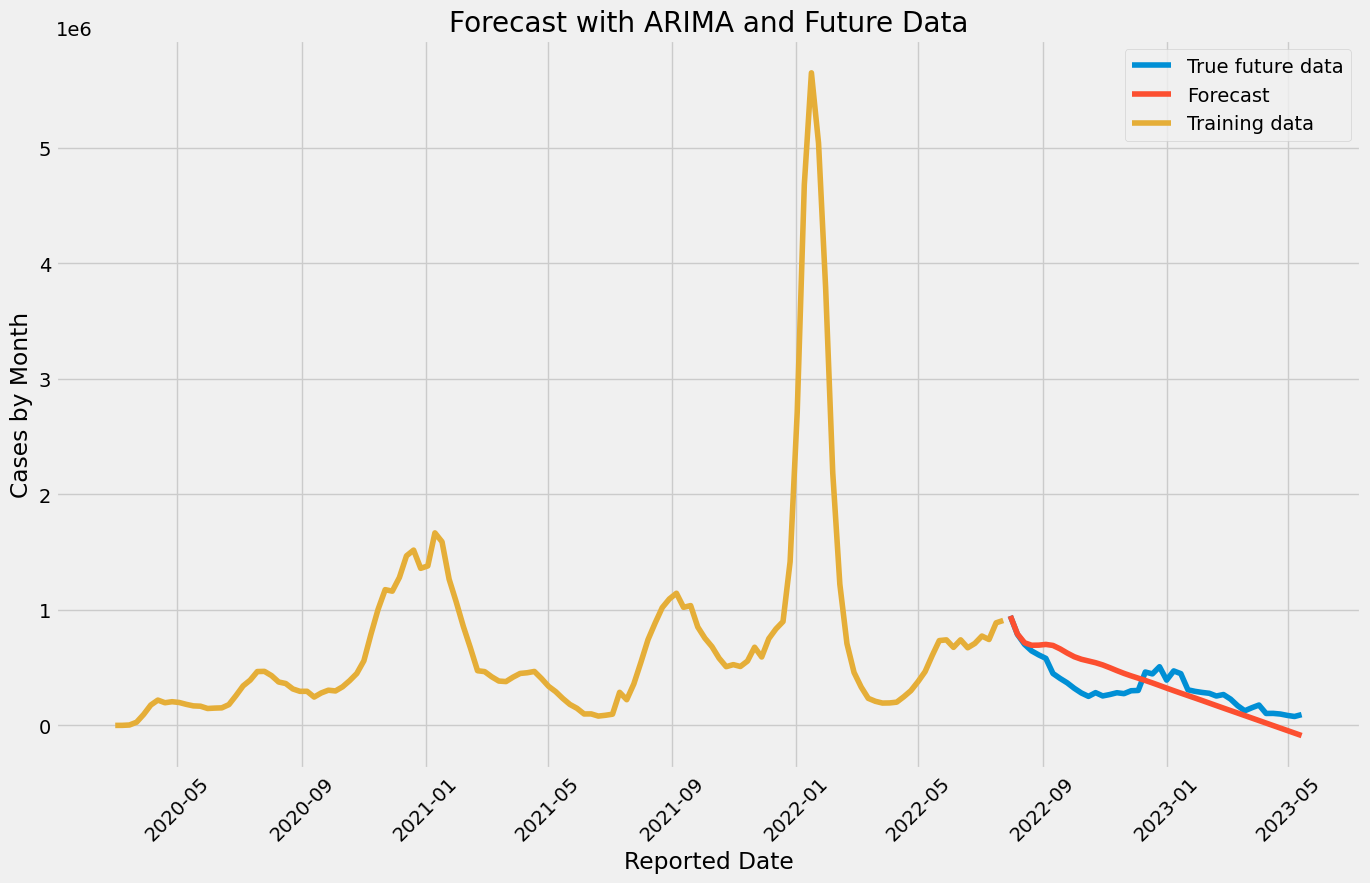

In [64]:
# Fit ARIMA model
arma_mod = ARIMA(y_hist, order=best_order).fit()  # p,d,q) values can be tuned
#model_fit = model.fit()

# Forecast next 30 days
forecast = arma_mod.forecast(steps= len(y_future))
#print(forecast.head())
forecast = forecast.to_frame().rename(columns={'predicted_mean' : 'new_cases'})
forecast.loc['2022-07-31'] = (y_future.loc['2022-07-31'])
#forecast.head()

# plot the forecast
plt.plot(y_future, label = 'True future data')
plt.plot(forecast, label = 'Forecast')
plt.plot(y_hist, label = 'Training data')
plt.legend()
plt.xlabel('Reported Date')
plt.ylabel('Cases by Month')
plt.title('Forecast with ARIMA and Future Data')
plt.xticks(rotation = 45);

# prediction error
pred_error = y_future - forecast
mae = np.abs(pred_error).mean()
mse = ((pred_error)**2).mean()
rmse = np.sqrt((pred_error**2).mean())
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

print(f"AIC: {arma_mod.aic}, BIC: {arma_mod.bic}")

### **Interpretation of ARIMA model forecast:**
This plot shows COVID-19 daily new cases forecast using the ARIMA model. It shows historical data (training set), the predicted future cases, and actual future cases to evaluate the accuracy of the model.

### **Key Findings from ARIMA model:**
**Training Data (Yellow Line):** The historical COVID-19 cases data shows multiple waves. There is a significant spike in early 2022, likely due to the Omicron variant. The trend decreases after the peak but fluctuates slightly in mid-2022.

**Forecast (Red Line):**
The ARIMA model predicts a gradual decline in cases after mid-2022. The forecasted values show a smooth downward trend, indicating that the model expects cases to decrease over time.
The predicted trend follows a relatively linear downward slope.

**True Future Data (Blue Line):**
The actual future case data does not perfectly match the forecast. While the overall trend aligns, there are fluctuations and deviations from the ARIMA prediction.
The real data shows more variability, suggesting external factors influencing case numbers that ARIMA did not fully capture.

### **Interpretation of Evaluation Metrics for ARIMA Model**  
These metrics help evaluate the accuracy of the ARIMA model in forecasting COVID-19 cases.

#### **1. Mean Absolute Error (MAE):** **134,360.85**  
- MAE represents the average absolute difference between actual and predicted values.
- An MAE of **134,360** means that, on average, the model’s predictions deviate by **134,360 new cases** from the actual values.
- **Lower MAE indicates a better model fit.**  

#### **2. Mean Squared Error (MSE):** **2.48 × 10¹⁰ (24.81 billion)**  
- MSE calculates the average squared difference between actual and predicted cases.
- Since the values are squared, larger errors contribute disproportionately to this metric.
- A high MSE suggests that the model has **some large deviations**, possibly from outliers or sudden spikes in cases.

#### **3. Root Mean Squared Error (RMSE):** **157,527.53**  
- RMSE is the square root of MSE and provides an interpretable error in the original unit (number of cases).
- An RMSE of **157,527** indicates that the model’s predictions typically vary by this amount.
- **Compared to MAE, RMSE penalizes larger errors more.**  

#### **4. Akaike Information Criterion (AIC):** **3380.63**  
- AIC is used for model selection—lower values indicate a better fit with fewer parameters.
- **AIC = 3380.63 suggests that the model is reasonable, but a lower value would indicate a better trade-off between accuracy and complexity.**

#### **5. Bayesian Information Criterion (BIC):** **3397.55**  
- Like AIC, BIC penalizes model complexity more heavily.
- A **higher BIC suggests potential overfitting**, meaning the model might be too complex for the data.

### **Key Insights & Next Steps**  
**Model is fairly accurate**: The MAE and RMSE values suggest that the ARIMA model provides a reasonable estimate of COVID-19 cases.  
**Errors are still significant**: Given the scale of COVID-19 cases, errors in the range of 100,000+ cases may impact policy decisions.  
**Possible improvements**:  
- **Hybrid models** (ARIMA + LSTM or XGBoost) to improve short-term fluctuations.  
- **SARIMA model** to better capture seasonal trends in COVID-19 cases.  


### **Model Performance Analysis**

The forecast captures the general downward trend but does not predict fluctuations accurately. ARIMA is limited in handling sudden surges or policy-driven changes (e.g., new variants, lockdowns, or reporting anomalies).

**Next Steps:** Consider using SARIMA for capturing seasonality.


# SARIMA Model for Forecasting


Optimal SARIMA order (based on lowest MAE, then RMSE): (1, 0, 1), (0, 0, 1, 12)
AIC:  3115.4459733797967
Best MAE: 93492.02608651693
Best RMSE: 120133.12798429836


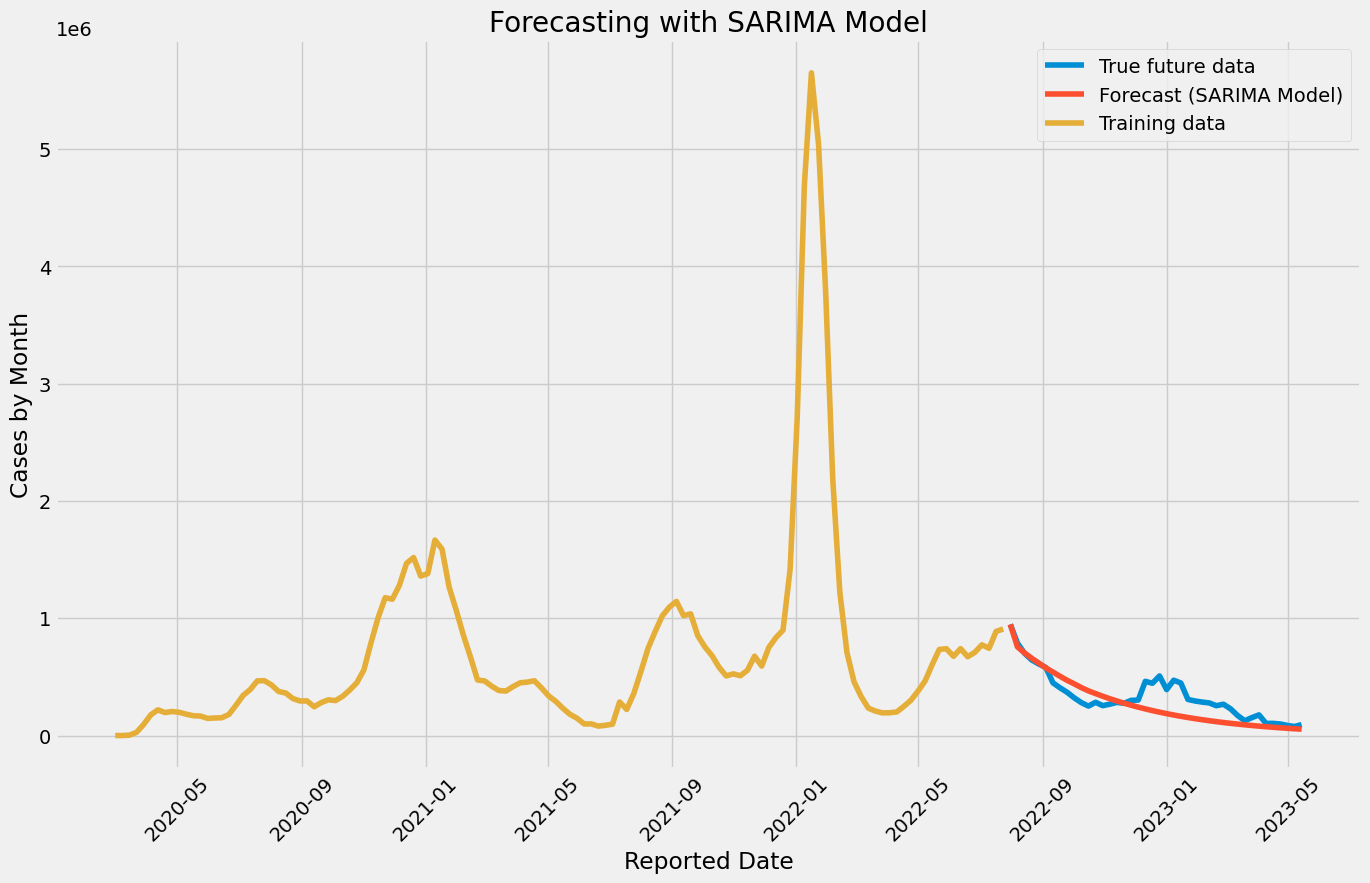

MAE: new_cases    97100.098177
dtype: float64
MSE: new_cases    1.638419e+10
dtype: float64
RMSE: new_cases    128000.760619
dtype: float64
AIC: 3462.8097922806196, BIC: 3474.1549199084257


In [65]:
# load SARIMA model from statsmodel

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the p, d, q, P, D, Q, and s values for the SARIMA model
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

best_aic = float("inf")
best_order = None
best_seasonal_order = None
best_model = None
best_mae = float('inf')
best_rmse = float('inf')


for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(y_hist,
                            order=param,
                            seasonal_order=param_seasonal,
                            enforce_stationarity=False,
                            enforce_invertibility=False)

            results = mod.fit()

            predictions = results.predict(start=len(y_hist), end=len(us_df)-1) # Predict on the test set
            mae = mean_absolute_error(y_future, predictions)
            rmse = np.sqrt(mean_squared_error(y_future, predictions))

            if mae < best_mae:  # Prioritize lowest MAE
              best_mae = mae
              best_rmse = rmse
              best_aic = results.aic
              best_order = param
              best_seasonal_order = param_seasonal
              best_model = results
            elif mae == best_mae and rmse < best_rmse: # If MAE is the same, choose the one with lower RMSE
              best_rmse = rmse
              best_aic = results.aic
              best_order = param
              best_seasonal_order = param_seasonal
              best_model = results

        except Exception as e:
            print(f"Error fitting SARIMA model with order {param} and seasonal order {param_seasonal}: {e}")

print(f"Optimal SARIMA order (based on lowest MAE, then RMSE): {best_order}, {best_seasonal_order}")
print("AIC: ", best_aic)
print(f"Best MAE: {best_mae}")
print(f"Best RMSE: {best_rmse}")


# Fit the best SARIMA model
sarima_mod = SARIMAX(y_hist, order=best_order, seasonal_order=best_seasonal_order).fit()

# Forecast future values
forecast = sarima_mod.forecast(steps=len(y_future))
forecast = forecast.to_frame().rename(columns={'predicted_mean':'new_cases'})
forecast.loc['2022-07-31'] = (y_future.loc['2022-07-31'])


# Plot the forecast
plt.plot(y_future, label='True future data')
plt.plot(forecast, label='Forecast (SARIMA Model)')
plt.plot(y_hist, label='Training data')
plt.legend()
plt.xlabel('Reported Date')
plt.ylabel('Cases by Month')
plt.title('Forecasting with SARIMA Model')
plt.xticks(rotation=45)
plt.show()


# Prediction error
pred_error = y_future - forecast
mae = np.abs(pred_error).mean()
mse = ((pred_error)**2).mean()
rmse = np.sqrt((pred_error**2).mean())
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

print(f"AIC: {sarima_mod.aic}, BIC: {sarima_mod.bic}")


### **Interpretation of SARIMA Model Evaluation Metrics**  

The **SARIMA (Seasonal ARIMA) model** incorporates seasonality into forecasting, making it suitable for time series data with recurring patterns.

#### **1. Mean Absolute Error (MAE):** **97,100.10**  
- The average absolute difference between actual and predicted values is **97,100 cases**.
- **Compared to ARIMA (134,360 cases), SARIMA performs better**, reducing the average error by **~37,000 cases**.

#### **2. Mean Squared Error (MSE):** **1.64 × 10¹⁰ (16.38 billion)**  
- The average squared difference between actual and predicted values.
- **SARIMA's MSE is lower than ARIMA's (24.81 billion), meaning it handles large fluctuations better**.

#### **3. Root Mean Squared Error (RMSE):** **128,000.76**  
- RMSE measures typical prediction error magnitude in actual case counts.
- **SARIMA's RMSE (128,000) is lower than ARIMA's (157,527),** suggesting it makes fewer large errors.

#### **4. Akaike Information Criterion (AIC):** **3462.81**  
- AIC penalizes overly complex models while assessing fit quality.
- **SARIMA’s AIC (3462.81) is slightly higher than ARIMA’s (3380.63), meaning ARIMA has a better balance of fit and simplicity**.

#### **5. Bayesian Information Criterion (BIC):** **3474.15**  
- BIC applies a stronger penalty for model complexity.
- **SARIMA’s BIC (3474.15) is slightly higher than ARIMA’s (3397.55),** implying SARIMA might be slightly more complex.




### **Model Performance Analysis:**

#### Based on the metrics,  **SARIMA outperforms ARIMA** in accuracy:

Lower MAE, MSE, and RMSE indicate better predictive performance. The reduction in errors suggests that SARIMA effectively captures seasonal trends in COVID-19 cases.

#### SARIMA has a slightly higher AIC & BIC:

This suggests the model is a bit more complex than ARIMA, but its improved accuracy justifies the trade-off.

**Potential Improvements:**

- Hyperparameter tuning to reduce AIC/BIC without sacrificing accuracy.
- External factors (e.g., vaccination rates, mobility data, weather patterns) in an SARIMAX model could enhance predictions.
- Comparing with other models like Prophet or LSTMs for further optimization.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.

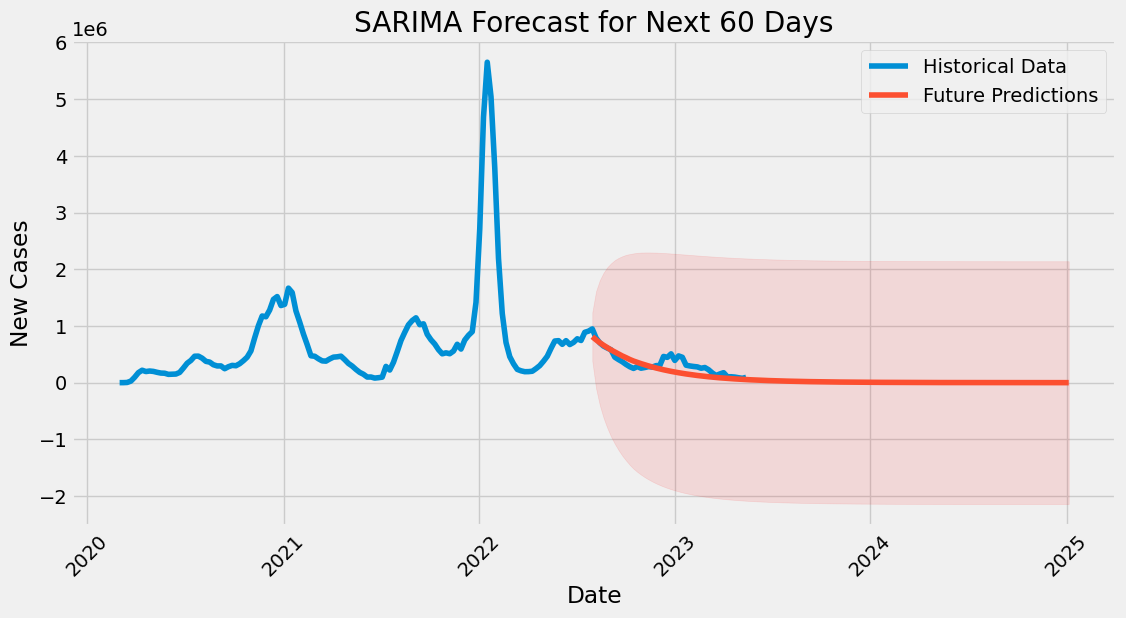

In [66]:
# Forecast the next 128 days
future_forecast = sarima_mod.get_forecast(steps=128)
future_forecast_df = future_forecast.conf_int()
future_forecast_df['Predictions'] = future_forecast.predicted_mean
future_forecast_df.index = pd.to_datetime(future_forecast_df.index)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(us_df.index, us_df['new_cases'], label='Historical Data')
plt.plot(future_forecast_df.index, future_forecast_df['Predictions'], label='Future Predictions')
plt.fill_between(future_forecast_df.index, future_forecast_df['lower new_cases'], future_forecast_df['upper new_cases'], color='r', alpha=.1)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.title('SARIMA Forecast for Next 60 Days')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In this plot, I have shown the predictions made by the SARIMA model for future days. The red line shows the forecast of new cases. The shaded region shows the confidence interval (lower and upper bound of the predicted mean). It suggests that the new cases will decline in future with high variance.

# **Report of the Project**

### **1. Introduction**
The COVID-19 pandemic has profoundly impacted public health and the economy, necessitating forecasting and risk prediction models to help decision-making. Accurate forecasting of COVID-19 cases can assist policymakers, healthcare professionals, and researchers in optimizing resource allocation, implementing timely interventions, and mitigating the spread of the virus.
Goal: The primary goal of this project is to explore the COVID-19 trends around the globe and to develop a machine learning model to predict the daily new cases in the United States. This will involve:
•	Time Series Forecasting: predicting the daily number of new cases over the next few months.
### **2. Data Overview**
•	Dataset: WHO COVID-19 dataset
•	Time Period: Covers cases from early 2020 to 2023
•	Target Variable: New COVID-19 cases reported daily
•	Data Size: It consists of 57,840 entries and 8 columns.
•	Data Preprocessing: Handled missing values, ensured stationarity and applied log transformation for stabilization
### **3. Methodology**
Exploratory Data Analysis (EDA)
We used EDA to understand the distribution and trends of COVID-19 cases and deaths across different regions and countries.
Forecasting Models
We used two-time series models to predict the future COVID-19 cases in the USA.
•	ARIMA (AutoRegressive Integrated Moving Average): A widely used model for non-seasonal time series forecasting.
•	SARIMA (Seasonal ARIMA): An extension of ARIMA that accounts for seasonality in the data.

### **4. Model Evaluation**
The following evaluation metrics were used:
Metric	ARIMA 	SARIMA
MAE (Mean Absolute Error)	134,360	97,100
MSE (Mean Squared Error)	24.81 billion	16.38 billion
RMSE (Root Mean Squared Error)	157,527	128,000
AIC (Akaike Information Criterion)	3380.63	3462.81
BIC (Bayesian Information Criterion)	3397.55	3474.15
### **5. Results and Analysis**
EDA provides the following insights:
•	The EMRO and EURO regions show a higher frequency of case counts, whereas other regions exhibit a wider range of variation.
•	The distribution of new deaths across regions is right-skewed, indicating many days with low deaths but occasional extreme spikes, suggesting outbreaks.
•	The data reveals multiple peaks, likely corresponding to different COVID-19 waves, such as the Delta and Omicron variants.
•	The EURO region had the highest number of cases at the beginning of 2022, while WPRO saw the highest cases at the end of 2022.
•	The USA recorded the highest number of new cases at the start of 2022, and China had the highest cases by the end of the year.
•	The pie chart of new cases showed the USA leading in infections among the top eight countries, with Japan having the lowest share.
•	Analysis of death surges indicated about six major waves, with the highest peaks occurring in early 2021 and early 2022 due to insufficient intervention measures.
•	The highest death toll was observed in the US, particularly during early 2021 and early 2022, whereas India experienced a massive surge in mid-2021 due to the Delta variant.
Modeling provides the following insights:
SARIMA outperforms ARIMA in terms of accuracy (lower MAE, MSE, and RMSE), suggesting that seasonality plays a significant role in COVID-19 case trends.
•	ARIMA has a lower AIC and BIC, indicating a slightly simpler model, but at the cost of higher prediction errors.
•	The forecasted trends from SARIMA align more closely with the actual future data, validating its suitability for COVID-19 forecasting.
### **6. Visual Insights**
•	The forecast plots indicate that SARIMA provides a more accurate representation of future trends, capturing both periodic fluctuations and general trends.
•	ARIMA's forecasts deviate more significantly from actual data, particularly in high-variance periods.
### **7. Conclusion**
The SARIMA model is the best choice for forecasting COVID-19 cases due to its superior performance in handling seasonality. This model will help public health officials and policymakers make informed decisions regarding pandemic response and resource allocation.

### **8. Recommendations**
•	SARIMA should be the preferred model for deployment due to its improved accuracy.
•	Further improvements: Adding external variables (e.g., vaccination rates, mobility data) using an SARIMAX model could enhance performance.
•	Deployment Strategy: Automate model updates with real-time data to refine forecasts continuously



